<h1 id="header">Capsteone Week 3</h1>
<h2 id="headers2">Predicting the Severity of Accident</h2>

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [422]:
df = pd.read_csv(r'C:\Users\a.elambilat\Data-Collisions.csv',header =0)

C:\Users\a.elambilat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [423]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [425]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [426]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


<h4> Note : Most accidents are happening when roads are dry </h4>

In [427]:
df['WEATHER'].value_counts().to_frame()             

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


<AxesSubplot:>

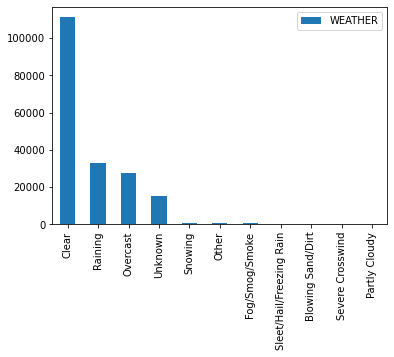

In [428]:
df['WEATHER'].value_counts().to_frame().plot(kind="bar")

<h5> Note : Most accidents are happening during the clear whether  </h5>

<AxesSubplot:title={'center':'Severity'}>

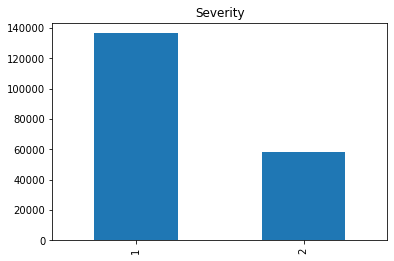

In [429]:
df['SEVERITYCODE'].value_counts().to_frame()  
df['SEVERITYCODE'].value_counts().plot(kind="bar",title="Severity")


In [430]:
df['SEVERITYCODE'].value_counts().to_frame() 

,SEVERITYCODE
1,136485
2,58188


In [431]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


<AxesSubplot:title={'center':'Lighting condition'}>

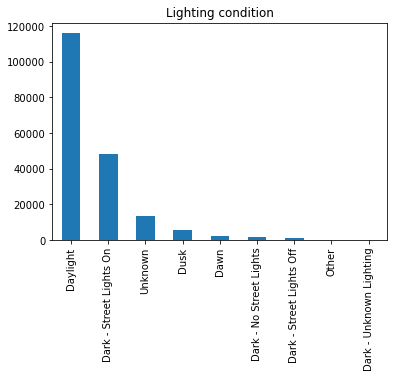

In [432]:
df['LIGHTCOND'].value_counts().plot(kind="bar",title="Lighting condition")

In [433]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


<AxesSubplot:title={'center':'Road condition'}>

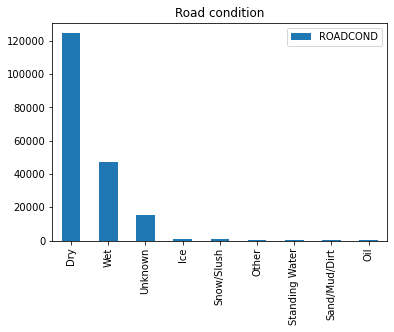

In [434]:
df['ROADCOND'].value_counts().to_frame().plot(kind="bar", title="Road condition")

In [435]:
df2 = df.filter(['SEVERITYCODE','LIGHTCOND','WEATHER','ROADCOND'],axis = 1)
df2.head(10)

,SEVERITYCODE,LIGHTCOND,WEATHER,ROADCOND
0,2,Daylight,Overcast,Wet
1,1,Dark - Street Lights On,Raining,Wet
2,1,Daylight,Overcast,Dry
3,1,Daylight,Clear,Dry
4,2,Daylight,Raining,Wet
5,1,Daylight,Clear,Dry
6,1,Daylight,Raining,Wet
7,2,Daylight,Clear,Dry
8,1,Daylight,Clear,Dry
9,2,Daylight,Clear,Dry


<h4> Note : Evaluating is there any corelation between four selected variables. Converting Categorical values to numeric to plot heat map</h4>

In [436]:
cleanup_nums = {"SPEEDING": {"Y": 1,"N": 2}}

cleanup_nums = {"LIGHTCOND": {"Daylight" :1, "Dark - Street Lights On": 2,"Unknown": 3,"Dusk": 4,"Dawn": 5,"Dark - No Street Lights": 6,
                 "Dark - Street Lights Off": 7,"Other": 8,"Dark - Unknown Lighting": 9},
                 "WEATHER": {"Clear" :1,"Raining":2,"Overcast":3,"Unknown":4,"Snowing":5,"Other":6,"Fog/Smog/Smoke":7,
                             "Sleet/Hail/Freezing Rain":8,"Blowing Sand/Dirt":9,"Severe Crosswind":10,"Partly Cloudy":11},
                "ROADCOND":{"Dry" :1,"Wet":2,"Unknown" :3,"Ice" :4,"Snow/Slush": 5,"Other": 6,"Standing Water" : 7,
                            "Sand/Mud/Dirt" : 8,"Oil":9}
                }
df2.replace(cleanup_nums, inplace=True)
df2.head()


,SEVERITYCODE,LIGHTCOND,WEATHER,ROADCOND
0,2,1.0,3.0,2.0
1,1,2.0,2.0,2.0
2,1,1.0,3.0,1.0
3,1,1.0,1.0,1.0
4,2,1.0,2.0,2.0


<h4> Looking in to data to understand severity based on above three variables. Whether light condition , whether and road condition has dependancy on sevirity </h4>

<AxesSubplot:>

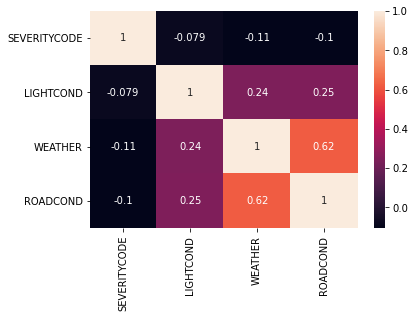

In [437]:
import seaborn as sns
import matplotlib  as plt
sns.heatmap(df2.corr(),annot=True)

#### Looking in to the heat map, there is no significant corelation between LIGHTCOND,	WEATHER,ROADCOND WITH SEVERITY. Only corilation is between weather and road condition that obivious

In [438]:
df3 = df2.filter(['SEVERITYCODE','LIGHTCOND','WEATHER','ROADCOND'],axis = 1)
df3.head(10)


,SEVERITYCODE,LIGHTCOND,WEATHER,ROADCOND
0,2,1.0,3.0,2.0
1,1,2.0,2.0,2.0
2,1,1.0,3.0,1.0
3,1,1.0,1.0,1.0
4,2,1.0,2.0,2.0
5,1,1.0,1.0,1.0
6,1,1.0,2.0,2.0
7,2,1.0,1.0,1.0
8,1,1.0,1.0,1.0
9,2,1.0,1.0,1.0


In [439]:
from sklearn.utils import resample

#Downsampling to normalize the data
df_majority = df3[df3.SEVERITYCODE==1]
df_minority = df3[df3.SEVERITYCODE==2]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,SEVERITYCODE,LIGHTCOND,WEATHER,ROADCOND
25055,1,2.0,2.0,2.0
65280,1,1.0,1.0,1.0
86292,1,3.0,4.0,3.0
155111,1,1.0,1.0,1.0
64598,1,1.0,1.0,1.0


In [440]:
df_downsampled['SEVERITYCODE'].value_counts()

df_downsampled.fillna(999, inplace=True)

In [441]:
X= np.asarray(df_downsampled[['LIGHTCOND','WEATHER','ROADCOND']])
X[0:4]

array([[2., 2., 2.],
       [1., 1., 1.],
       [3., 4., 3.],
       [1., 1., 1.]])

In [442]:
y=np.asarray(df_downsampled['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [443]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42 )
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set : ', X_test.shape, y_test.shape)

Train Set:  (81463, 3) (81463,)
Test Set :  (34913, 3) (34913,)


<h4> K-Nearest Neighbors (KNN)   </h4>

In [444]:
from sklearn.neighbors import KNeighborsClassifier
k=21


In [445]:
#Train and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

### Accuracy evaluation

In [446]:
from sklearn import metrics
print("Train Set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test Set Accuracy:", metrics.accuracy_score(y_test, Kyhat))

Train Set Accuracy: 0.5637160428660865
Test Set Accuracy: 0.5598487669349526


In [447]:
Ks = 30
accuracy = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    Kyhat = neigh.predict(X_test)
    accuracy[n-1]  = metrics.accuracy_score(y_test, Kyhat)
    

accuracy

array([0.54498324, 0.5144502 , 0.54329333, 0.54323604, 0.53968436,
       0.54698823, 0.55569559, 0.55549509, 0.54713144, 0.55638301,
       0.55704179, 0.55818749, 0.55979148, 0.5595337 , 0.55581016,
       0.55827342, 0.56016384, 0.56030705, 0.55291725, 0.56059348,
       0.55984877, 0.56119497, 0.55689858, 0.55391974, 0.54945149,
       0.55555237, 0.55558102, 0.55560966, 0.55560966])

***Best K Value is 21***

## Decision Tree

In [463]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy", max_depth =7)
decTree
decTree.fit(X_train, y_train)
print(X_test[0:5])

[[999. 999. 999.]
 [  5.   2.   2.]
 [  1.   1.   1.]
 [  2.   3.   2.]
 [  1.   1.   1.]]


In [464]:
# Train Model & Predict
predTree = decTree.predict(X_test)
print(predTree[0:5])
print(y_test[0:5])

[1 2 2 2 2]
[1 1 2 1 1]


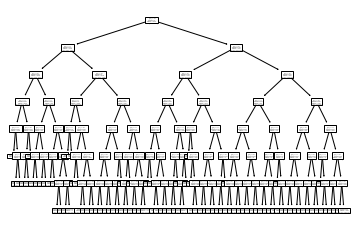

In [466]:
from sklearn import tree
tree.plot_tree(decTree)
plt.show()

### Check the accuracy

In [450]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5614813966144416


## Logistic Regression

In [451]:
#Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=6, solver='liblinear')

In [452]:
#Train the Model
LRyhat = LR.predict(X_test)
LRyhat[0:5]


array([1, 2, 2, 2, 2], dtype=int64)

In [453]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.61880028, 0.38119972],
       [0.49541381, 0.50458619],
       [0.49489216, 0.50510784],
       ...,
       [0.49502389, 0.50497611],
       [0.49489216, 0.50510784],
       [0.494856  , 0.505144  ]])

In [454]:
metrics.accuracy_score(y_test, LRyhat)

0.5009595279695243

## Disucssion 

Looking in to the data, initial understanding is Weather condition could be the major reason for the accidents. After analyzing by plotting heatmap, it is found there is no major correlation between weather, light and road condition and is not the major cause of accidents. Traffic team should consider looking into other data cause the accidents. 

After downsampling and balancing the data, it was 70% of balanced data feeded to the training set. Three alogorith KNN, Decision Tree and Logistic regression being used to train  the model. Since the target variable is binary in nature logistic regression gives the best out prediction output. 


## Conclusion

There is no information available about the traffic - Number of vehicles passing through each street during different condition of weather, light and road. If we have this information, we could been analyzed the number of accidents happening in different Weather, Lighting condition in comparing to the traffics in the road. 
Dark with street light on is the second highest accidents, Light condition is one of the major reason for the accidents and to be analyzed based on the number of vehicles passed and number of accidents in comparison with the daylight. 
We can conclude weather condition and light condition is having an impact on the accidents. Adding more light in the dark locations could reduce the number of accidents. More data to be collected about the traffic during different weather and light condition and to be anazlyzed.

